In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Define modified LeNet
class ModifiedLeNet(nn.Module):
    def __init__(self):
        super(ModifiedLeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)  # Adjust convolution window size
        self.pool = nn.MaxPool2d(2, 2)  # Replace average pooling with max-pooling
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # Adjust number of output channels
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # Adjust number of fully connected layers
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # Replace softmax with ReLU

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [10]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [11]:
# Instantiate the model, loss function, and optimizer
net = ModifiedLeNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [5]:
# Training loop
for epoch in range(5):  # Adjust number of epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 2.304
[1,   200] loss: 2.293
[1,   300] loss: 2.279
[1,   400] loss: 2.259
[1,   500] loss: 2.205
[1,   600] loss: 2.002
[1,   700] loss: 1.256
[1,   800] loss: 0.685
[1,   900] loss: 0.478
[2,   100] loss: 0.390
[2,   200] loss: 0.339
[2,   300] loss: 0.304
[2,   400] loss: 0.290
[2,   500] loss: 0.271
[2,   600] loss: 0.249
[2,   700] loss: 0.244
[2,   800] loss: 0.202
[2,   900] loss: 0.217
[3,   100] loss: 0.190
[3,   200] loss: 0.186
[3,   300] loss: 0.193
[3,   400] loss: 0.175
[3,   500] loss: 0.166
[3,   600] loss: 0.169
[3,   700] loss: 0.175
[3,   800] loss: 0.152
[3,   900] loss: 0.152
[4,   100] loss: 0.126
[4,   200] loss: 0.140
[4,   300] loss: 0.138
[4,   400] loss: 0.138
[4,   500] loss: 0.123
[4,   600] loss: 0.131
[4,   700] loss: 0.131
[4,   800] loss: 0.129
[4,   900] loss: 0.131
[5,   100] loss: 0.115
[5,   200] loss: 0.121
[5,   300] loss: 0.112
[5,   400] loss: 0.105
[5,   500] loss: 0.107
[5,   600] loss: 0.104
[5,   700] loss: 0.104
[5,   800] 

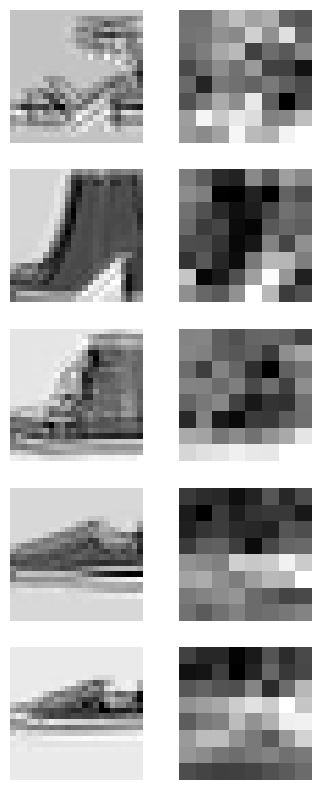

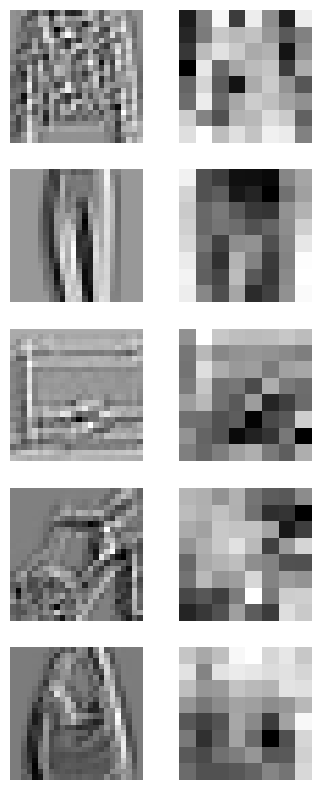

In [12]:
# Display activations of the first and second layers for different inputs

def plot_activations(layer_num, num_images):
    activations = []
    hooks = []

    def hook_fn(module, input, output):
        activations.append(output)

    hooks.append(net.conv1.register_forward_hook(hook_fn))
    hooks.append(net.conv2.register_forward_hook(hook_fn))

    # Iterate over the data loader to get a batch of images
    for images, labels in trainloader:
        outputs = net(images)
        break  # Break after the first batch

    for hook in hooks:
        hook.remove()

    activations = [act.detach().numpy() for act in activations]
    num_layers = len(activations)
    fig, axes = plt.subplots(num_images, num_layers, figsize=(num_layers * 2, num_images * 2))

    for i in range(num_images):
        for j in range(num_layers):
            axes[i, j].imshow(activations[j][i, layer_num], cmap='gray')
            axes[i, j].axis('off')

    plt.show()

plot_activations(layer_num=0, num_images=5)
plot_activations(layer_num=1, num_images=5)


In [15]:
# Function to generate random images
def generate_random_image():
    return torch.rand(1, 1, 28, 28)  # Random noise

# Test the network on different inputs
def test_network(input_image):
    output = torch.argmax(net(input_image))
    return output

random_image = generate_random_image()
print("Prediction for random image:", test_network(random_image))

Prediction for random image: tensor(3)
